In [1]:
%run ../macro_CURSO.py

Exception: File `'../macro_CURSO.py'` not found.

In [2]:
from qiskit import *
from qiskit.quantum_info import Statevector
U_simulator = Aer.get_backend('unitary_simulator')

qc_left= QuantumCircuit(2)
qc_right= QuantumCircuit(2)

qc_left.cx(0,1)
qc_left.cx(1,0)
qc_left.cx(0,1)
qc_right.swap(1,0)
 
print(qc_left)
print(qc_right)

U_left = execute(qc_left, backend = U_simulator).result().get_unitary()
U_right = execute(qc_right, backend = U_simulator).result().get_unitary()

          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘
        
q_0: ─X─
      │ 
q_1: ─X─
        


In [3]:
from qiskit.tools.visualization import array_to_latex
array_to_latex(U_left, prefix="\\text{U_left = }\n")

<IPython.core.display.Latex object>

In [4]:
array_to_latex(U_right, prefix="\\text{U_right = }\n")

<IPython.core.display.Latex object>

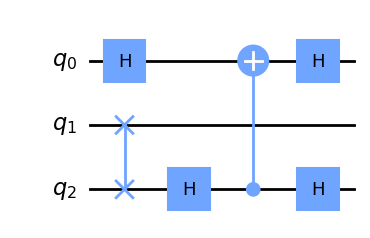

In [5]:
from qiskit import QuantumCircuit, transpile, Aer, QuantumRegister
qc = QuantumCircuit(3)


qc.h(0)
qc.swap(2,1)
qc.h(2)
qc.cx(2,0)
qc.h([0,2])
qc.draw('mpl')


In [6]:
print('tamaño=',qc.size())
print('puertas no locales=', qc.num_nonlocal_gates())
print('anchura=', qc.num_qubits)
print('profundidad=', qc.depth())


tamaño= 6
puertas no locales= 2
anchura= 3
profundidad= 4


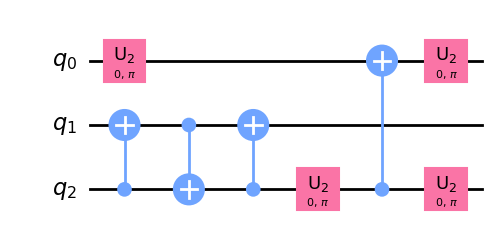

In [7]:
qc_dec=qc.decompose()
qc_dec.draw('mpl')

In [8]:
print('complejidad=', qc_dec.size())
print('puertas no locales=', qc_dec.num_nonlocal_gates())
print('anchura=', qc_dec.num_qubits)
print('profundidad=', qc_dec.depth())

complejidad= 8
puertas no locales= 4
anchura= 3
profundidad= 6


In [9]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

/tmp/ipykernel_20968/3448746441.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_20968/3448746441.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

In [10]:
backend = provider.get_backend("ibmq_lima")
backend.configuration().basis_gates

NameError: name 'provider' is not defined

In [11]:
#qc_trans = transpile(qc_dec)
qc_trans = transpile(qc,backend)
qc_trans.draw('mpl')

NameError: name 'backend' is not defined

In [12]:
print('complejidad=', qc_trans.size())
print('puertas no locales=', qc_trans.num_nonlocal_gates())
print('anchura=', qc_trans.num_qubits)
print('profundidad=', qc_trans.depth())

NameError: name 'qc_trans' is not defined